# Project #2

### E-Commerce Shipping Data
Product Shipment Delivered on time or not? To Meet E-Commerce Customer Demand

###Context

An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

## Content

- The dataset used for model building contained 10999 observations of 12 variables.
- The data contains the following information:

1. ID: ID Number of Customers.
2. Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
3. Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
4. Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
5. Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
6. Cost of the product: Cost of the Product in US Dollars.
7. Prior purchases: The Number of Prior Purchase.
8. Product importance: The company has categorized the product in the various parameter such as low, medium, high.
9. Gender: Male and Female.
10. Discount offered: Discount offered on that specific product.
11. Weight in gms: It is the weight in grams.
12. Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

### 변수 설명
1. ID : 고객들의 ID
2. Warehouse block : 회사는 A, B, C, D, E와 같이 블록으로 나누어 진 큰 창고를 가지고 있음
3. Mode of shipment : 회사는 선박, 비행 및 도로와 같은 다양한 방법으로 제품을 배송함
4. Customer care calls : 배송 조회 문의 전화 건수
5. Customer rating : 회사의 고객평가점수 - 1은 최저 (최악), 5는 최고
6. Cost of the product : 제품의 비용(미국 달러)
7. Prior purchases : 이전 구매 횟수
8. Product importance : 낮음, 중간, 높음 매개 변수로 제품을 분류
9. Gender : 여자/남자 성별
10. Discount offered : 특정 제품에 대한 할인이 제공
11. Weight in gms : 그램 단위의 무게
12. Reached on time : *target* 1은 제품이 정시에 도달하지 않았음, 0은 정시에 도달했음


### Inspiration
This data of Product Shipment Tracking, answer instantly to your questions:

- What was Customer Rating? And was the product delivered on time?
- Is Customer query is being answered?
- If Product importance is high. having higest rating or being delivered on time?


- Customer Rating은 무얼까? 이거에 따라 제품이 정시에 도착했는가?
- 제품의 중요도가 정시에 도착하는 것에 영향을 미치는가?

## EDA

In [1]:
# 데이터 파일을 불러오겠습니다.
from google.colab import files
file_uploaded = files.upload()

Saving Train.csv to Train.csv


In [2]:
import pandas as pd
import io
data = pd.read_csv(io.BytesIO(file_uploaded['Train.csv']), encoding='cp949')

data.head()

,癤풦D,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
#변수명 이쁘게 설정
data.rename(columns = {"癤풦D": "ID", 'Reached.on.Time_Y.N' : 'Reached_on_time'}, inplace = True)

data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_time
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
# ID column drop
# ID는 그냥 고객을 구분하기 위한 고유 번호로, 타겟에 영향을 미치는 특성이 아니므로 제거합니다.
data.drop('ID', inplace = True, axis = 1)

data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_time
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
#결측치는 없는 것으로 확인된다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached_on_time      10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


In [146]:
#중복값도 없다.
print(data.duplicated().sum())

0


In [6]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Warehouse_block,10999,5,F,3666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mode_of_Shipment,10999,3,Ship,7462,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_care_calls,10999,NaN,NaN,NaN,4.05446,1.14149,2,3,4,5,7
Customer_rating,10999,NaN,NaN,NaN,2.99054,1.4136,1,2,3,4,5
Cost_of_the_Product,10999,NaN,NaN,NaN,210.197,48.0633,96,169,214,251,310
Prior_purchases,10999,NaN,NaN,NaN,3.5676,1.52286,2,3,3,4,10
Product_importance,10999,3,low,5297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10999,2,F,5545,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Discount_offered,10999,NaN,NaN,NaN,13.3732,16.2055,1,4,7,10,65
Weight_in_gms,10999,NaN,NaN,NaN,3634.02,1635.38,1001,1839.5,4149,5050,7846


데이터의 특성을 살펴보겠습니다.

In [147]:
data['Warehouse_block'].unique()

['D', 'F', 'A', 'B', 'C']
Categories (5, object): ['D', 'F', 'A', 'B', 'C']

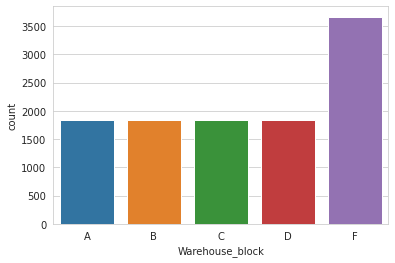

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.countplot(x=data['Warehouse_block']);

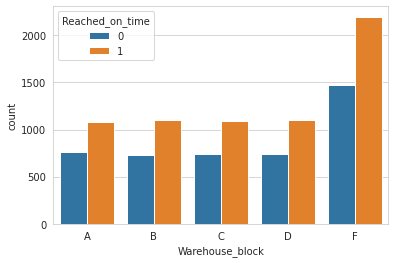

In [164]:
sns.countplot(data=data,x='Warehouse_block',hue='Reached_on_time')

In [9]:
data['Mode_of_Shipment'].unique()

array(['Flight', 'Ship', 'Road'], dtype=object)

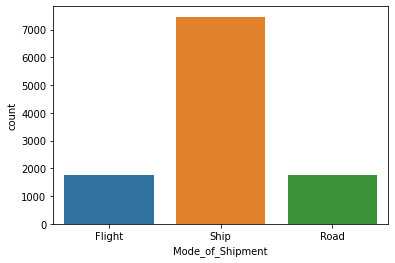

In [10]:
sns.countplot(x=data['Mode_of_Shipment']);

# Ship으로 배송되는 수가 가장 많다.

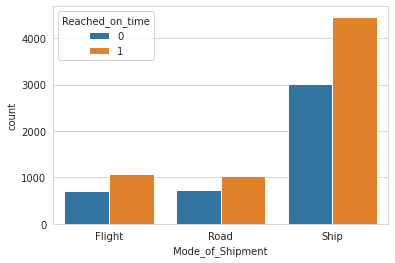

In [151]:
sns.countplot(data=data,x='Mode_of_Shipment',hue='Reached_on_time')
#plt.title('customers rate for the company')

In [11]:
data['Product_importance'].unique()

array(['low', 'medium', 'high'], dtype=object)

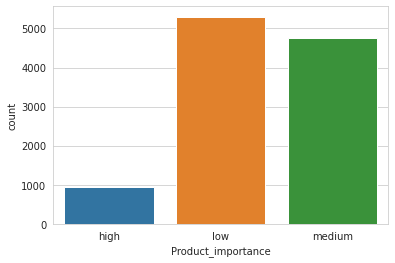

In [154]:
sns.countplot(x=data['Product_importance']);

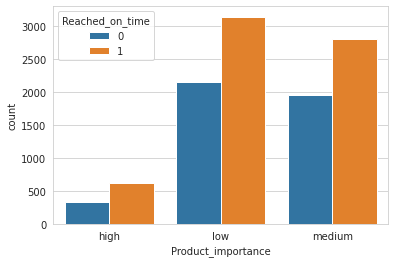

In [152]:
sns.countplot(data=data,x='Product_importance',hue='Reached_on_time')

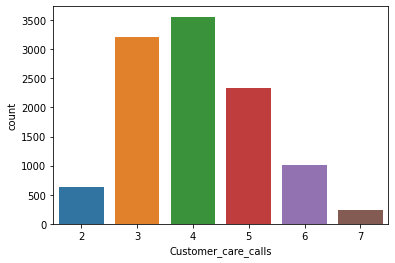

In [13]:
# Customer_care_calls
sns.countplot(x=data['Customer_care_calls']);

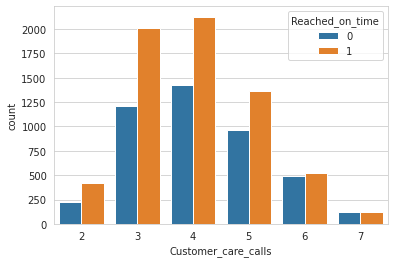

In [155]:
sns.countplot(data=data,x='Customer_care_calls',hue='Reached_on_time')

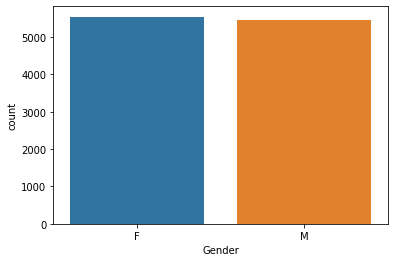

In [14]:
# Gender
sns.countplot(x=data['Gender']);

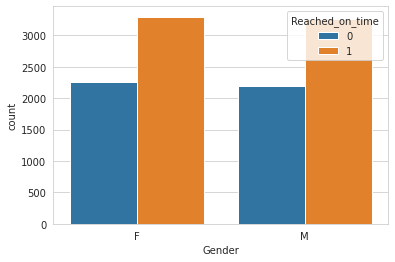

In [158]:
sns.countplot(data=data,x='Gender',hue='Reached_on_time')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


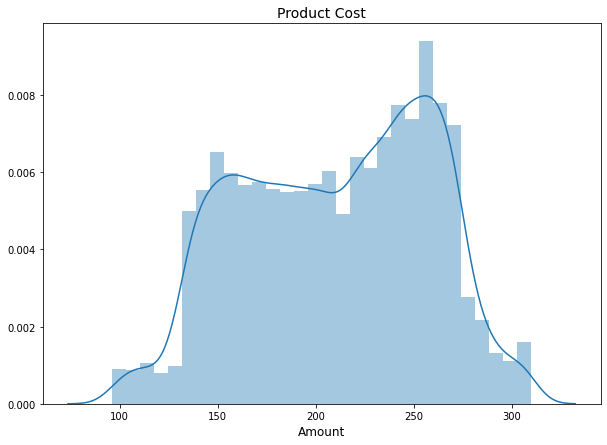

In [15]:
cost= data['Cost_of_the_Product']

plt.figure(figsize=(10, 7))

sns.distplot(cost).set(ylabel=None, xlabel=None)
plt.title('Product Cost', fontsize=14)
plt.xlabel('Amount', fontsize=12)
plt.show()

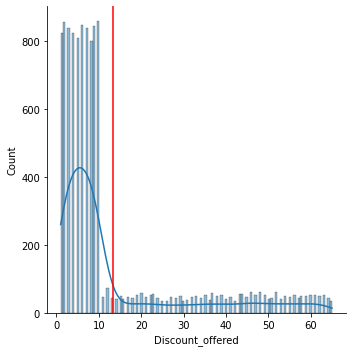

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(data['Discount_offered'],kde=True);
plt.axvline(data['Discount_offered'].mean(), color='red');

Discount_offered 특성은 왼쪽으로 매우 치우쳐져 있음을 확인할 수 있습니다.

In [17]:
data['Discount_offered'].mean()

13.37321574688608

In [18]:
def funcforD(x):
    if x < 13.36:
        return "LESS"
    elif 13.36 < x > 30:
        return "NORMAL"
    else:
        return "TOO MUCH"

In [19]:
data["Discount_offered"] = data["Discount_offered"].apply(lambda x: funcforD(x))

In [21]:
data['Discount_offered'].value_counts()

LESS        8514
NORMAL      1710
TOO MUCH     775
Name: Discount_offered, dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  object
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached_on_time      10999 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 945.4+ KB


In [23]:
#data['Discount'] = data['Discount'].astype(int)

성별 간 데이터 분포의 차이는 거의 없음을 확인할 수 있다.

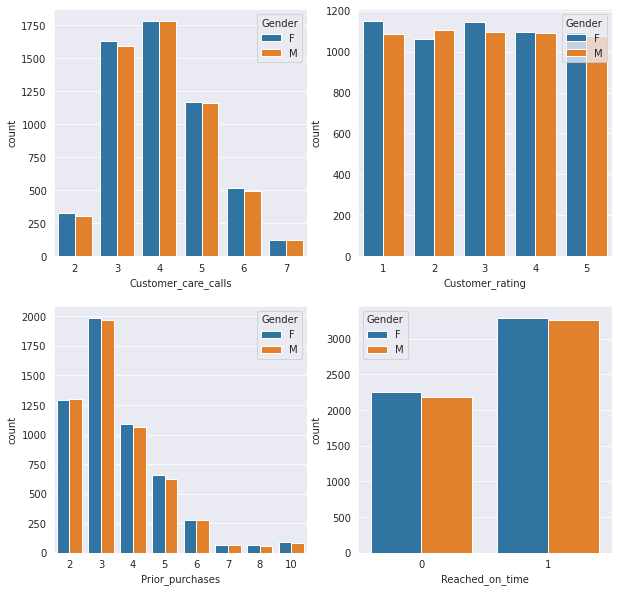

In [160]:
sns.set_style('darkgrid')

f,axes= plt.subplots(2,2, figsize=(10,10))

sns.countplot(x='Customer_care_calls',hue='Gender',data=data, ax=axes[0,0])
sns.countplot(x='Customer_rating',hue='Gender',data=data, ax=axes[0,1])
sns.countplot(x='Prior_purchases',hue='Gender',data=data, ax=axes[1,0])
sns.countplot(x='Reached_on_time',hue='Gender',data=data, ax=axes[1,1])

sns.set_style('whitegrid')

boxplot

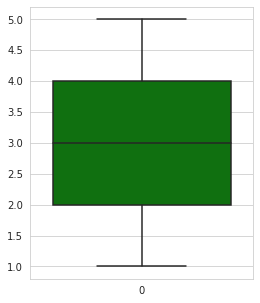

In [172]:
plt.figure(figsize = (4, 5))
sns.boxplot(data = data['Customer_rating'], color = 'green')
plt.show()

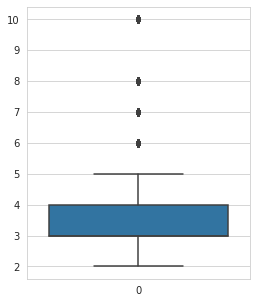

In [173]:
plt.figure(figsize = (4, 5))
sns.boxplot(data = data['Prior_purchases'])
plt.show()

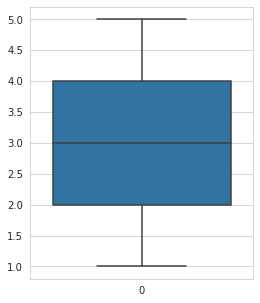

In [174]:
plt.figure(figsize = (4, 5))
sns.boxplot(data = data['Customer_rating'])
plt.show()

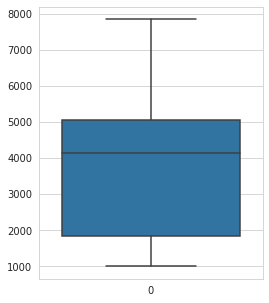

In [176]:
plt.figure(figsize = (4, 5))
sns.boxplot(data = data['Weight_in_gms'])
plt.show()

Prior_purchases 와 Discount_offered 는 한 쪽으로 치우쳐져 있다.


몇몇개의 특성을 범주형으로 바꾸었습니다.

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  object
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached_on_time      10999 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 945.4+ KB


In [27]:
#from sklearn.preprocessing import LabelEncoder

#encoder = LabelEncoder()

In [28]:
#objectcolumns = data.select_dtypes(include=["object"])
#print(objectcolumns.columns)

In [29]:
#for a in objectcolumns:
#    data[a] = encoder.fit_transform(data[a])

#data.info()

In [30]:
data['Discount_offered'] = data['Discount_offered'].astype('category')
data['Product_importance'] = data['Product_importance'].astype('category')
data['Warehouse_block'] = data['Warehouse_block'].astype('category')
data['Mode_of_Shipment'] = data['Mode_of_Shipment'].astype('category')
data['Gender'] = data['Gender'].astype('category')

In [31]:
data['Reached_on_time'].value_counts()

1    6563
0    4436
Name: Reached_on_time, dtype: int64

In [32]:
# data의 feature 간 상관관계
data.corr()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Weight_in_gms,Reached_on_time
Customer_care_calls,1.000000,0.012209,0.323182,0.180771,-0.276615,-0.067126
Customer_rating,0.012209,1.000000,0.009270,0.013179,-0.001897,0.013119
Cost_of_the_Product,0.323182,0.009270,1.000000,0.123676,-0.132604,-0.073587
Prior_purchases,0.180771,0.013179,0.123676,1.000000,-0.168213,-0.055515
Weight_in_gms,-0.276615,-0.001897,-0.132604,-0.168213,1.000000,-0.268793
Reached_on_time,-0.067126,0.013119,-0.073587,-0.055515,-0.268793,1.000000


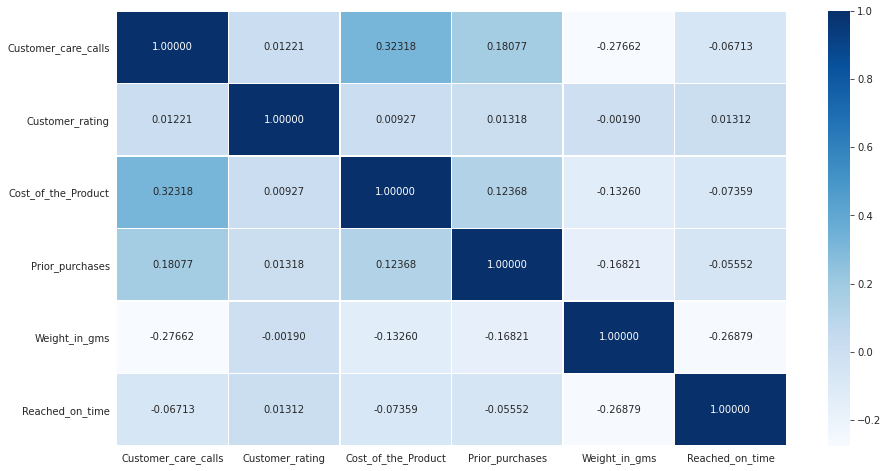

In [33]:
plt.figure(figsize=(15,8))
sns.heatmap(data = data.corr(), annot=True, 
fmt = '.5f', linewidths=.5, cmap='Blues')

데이터 셋을 나누겠습니다.

In [34]:
# On_time : 1
# Not On_time : 0
target = 'Reached_on_time'

In [35]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=2)

train.shape, test.shape

((8799, 11), (2200, 11))

In [36]:
# 80/20 비율로 학습/테스트 데이터를 분리합니다.
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train[target], random_state=2)

train.shape, val.shape

((7039, 11), (1760, 11))

In [37]:
# 훈련, 검정 세트로 나누기!
features = train.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

이 문제는 분류 문제로, 로지스틱 회귀 분석을 시행할 수 있습니다.

In [38]:
# 타겟 데이터 범주의 비율을 확인합니다.
y_train = train[target]
y_train.value_counts(normalize=True)

1    0.595681
0    0.404319
Name: Reached_on_time, dtype: float64

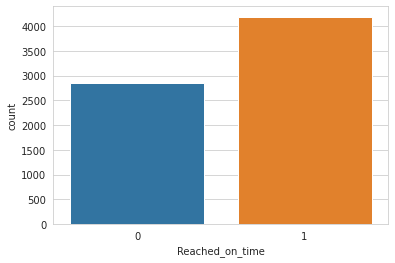

In [39]:
%matplotlib inline
sns.countplot(x=y_train);

(분류문제의 기준모델) 범주 1 (majority class)으로 모든 예측을 수행해 보겠습니다.

In [40]:
# mode(): Return the highest frequency value in a Series.
major = y_train.mode()[0]

# 타겟 샘플 수 만큼 0이 담긴 리스트를 만듭니다. 기준모델로 예측
y_pred = [major] * len(y_train)

분류에서는 회귀와 다른 평가지표(evaluation metrics)를 사용합니다.

정확도(Accuracy) 는 분류문제에서 사용하는 평가지표입니다.

이렇게 기준모델로 최다 비율 클래스를 사용할 경우 정확도를 구해 봅시다.

In [41]:
# 최다 클래스의 빈도가 정확도가 됩니다.
from sklearn.metrics import accuracy_score
print("training accuracy: ", accuracy_score(y_train, y_pred))

training accuracy:  0.595681204716579


In [42]:
# 검증세트 에서도 정확도를 확인해 볼 수 있습니다.
y_val = val[target]
y_pred = [major] * len(y_val)
print("validation accuracy: ", accuracy_score(y_val, y_pred))

validation accuracy:  0.5960227272727273


로지스틱회귀를 사용하면 타겟변수의 범주로 0과 1을 사용할 수 있으며 각 범주의 예측 확률값을 얻을 수 있습니다.

그래서 결과적으로 관측치가 특정 클래스에 속할 확률값으로 계산이 됩니다. 분류문제에서는 확률값을 사용하여 분류를 하는데, 예를들어 확률값이 정해진 기준값 보다 크면 1 아니면 0 이라고 예측을 하게 됩니다.

## 로지스틱 회귀모델

In [43]:
pip install --upgrade category_encoders

     |████████████████████████████████| 81kB 3.6MB/s 


- 카테고리 데이터 처리를 위해 OneHotEncoder
- 결측치(missing value) 처리를 위한 SimpleImputer
- 특성들의 척도를 맞추기 위해 표준정규분포로 표준화하는(평균=0, 표준편차=1) StandardScaler

In [44]:
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

enc = OneHotEncoder()
imp_mean = SimpleImputer()
scaler = StandardScaler()
model_lr = LogisticRegression(n_jobs=-1)

X_train_encoded = enc.fit_transform(X_train)
X_train_imputed = imp_mean.fit_transform(X_train_encoded)
X_train_scaled = scaler.fit_transform(X_train_imputed)
model_lr.fit(X_train_scaled, y_train)

X_val_encoded = enc.transform(X_val)
X_val_imputed = imp_mean.transform(X_val_encoded)
X_val_scaled = scaler.transform(X_val_imputed)

# score method: Return the mean accuracy on the given test data and labels
print('검증세트 정확도', model_lr.score(X_val_scaled, y_val))

X_test_encoded = enc.transform(X_test)
X_test_imputed = imp_mean.transform(X_test_encoded)
X_test_scaled = scaler.transform(X_test_imputed)

y_pred_lr = model_lr.predict(X_test_scaled)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


검증세트 정확도 0.6647727272727273


In [45]:
print("test accuracy :", accuracy_score(y_pred_lr, y_test))

test accuracy : 0.6463636363636364


모든 범주를 0으로 분류하는 기준모델보다 정확도가 높게 나왔습니다. 어느정도 학습이 잘 이루어진 것으로 보여집니다. 예측 결과를 보면 0과 1로 예측 한 것을 확인할 수 있습니다.

In [46]:
pred = model_lr.predict(X_val_scaled)
pred

array([1, 0, 1, ..., 0, 0, 1])

In [47]:
print(features)

print(model_lr.coef_)
# 수정사항 : 소숫점자리 5번째까지 표시할 수 있도록

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms'],
      dtype='object')
[[ 0.00846169 -0.00495767 -0.02651563  0.01037931  0.01034736  0.01617364
  -0.00827062 -0.01229882 -0.10211651  0.04141382 -0.06743283 -0.0873922
  -0.00558049 -0.02207181  0.04986924  0.00791783 -0.00791783 -1.64696129
   1.26976412  0.892666   -0.32478709]]


계수가 양수인 경우 정시에 도착할 가능성을 높이고 음수인 경우 정시에 도착할 가능성을 낮추는 것으로 해석할 수 있습니다.

평균은 0, 표준편차는 1로 표준화 되었습니다.

In [48]:
X_train_scaled.T[0].mean(), X_train_scaled.T[0].std()

(-4.037748178775964e-17, 1.0)

In [49]:
# 파이프라인으로 코드를 훨씬 간결하게 구축하였습니다.
pipe_lr = make_pipeline(
    OneHotEncoder(), 
    SimpleImputer(), 
    StandardScaler(), 
    LogisticRegression(n_jobs=-1)
)
pipe_lr.fit(X_train, y_train)

print('검증세트 정확도', pipe_lr.score(X_val, y_val))

y_pred_lr2 = pipe_lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


검증세트 정확도 0.6647727272727273


In [50]:
pipe_lr.named_steps

{'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=-1, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'onehotencoder': OneHotEncoder(cols=['Warehouse_block', 'Mode_of_Shipment', 'Product_importance',
                     'Gender', 'Discount_offered'],
               drop_invariant=False, handle_missing='value',
               handle_unknown='value', return_df=True, use_cat_names=False,
               verbose=0),
 'simpleimputer': SimpleImputer(add_indicator=False, copy=True, fill_value=None,
               missing_values=nan, strategy='mean', verbose=0),
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

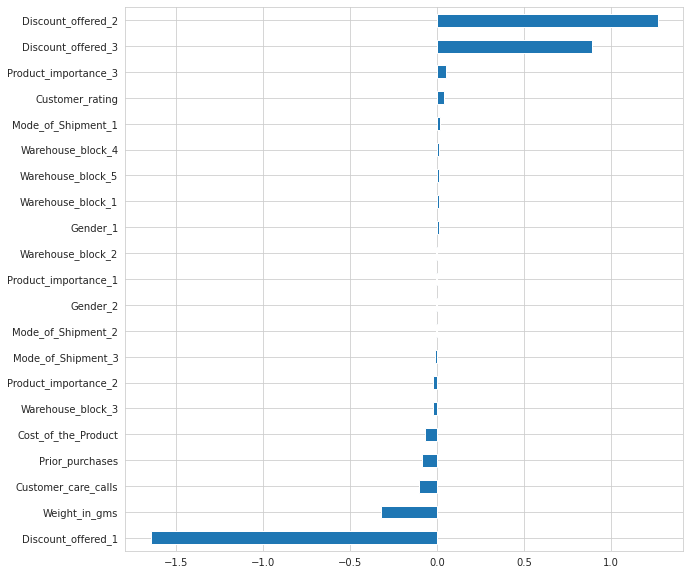

In [51]:
import matplotlib.pyplot as plt

model_lr = pipe_lr.named_steps['logisticregression']
enc = pipe_lr.named_steps['onehotencoder']
encoded_columns = enc.transform(X_val).columns
coefficients = pd.Series(model_lr.coef_[0], encoded_columns)
plt.figure(figsize=(10,10))
coefficients.sort_values().plot.barh();

그냥 원핫인코딩이 아닌, 순서형 인코딩으로 학습시켜 보겠습니다.

In [52]:
from category_encoders import OrdinalEncoder

pipe_lr_ord = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(),  
    LogisticRegression(n_jobs=-1)
)
pipe_lr_ord.fit(X_train, y_train)

print('검증세트 정확도', pipe_lr_ord.score(X_val, y_val))

검증세트 정확도 0.6494318181818182


In [53]:
print('테스트세트 정확도', pipe_lr_ord.score(X_test, y_test))

테스트세트 정확도 0.6354545454545455


## DesicionTreeClassifier 를 사용해 결정트리를 구현

파이프라인을 사용하면 위에서 본 코드에서 단지 분류기만 바꾸어 주면 됩니다! 그리고 결정트리에서는 StandardScaler는 도움이 되지 않기 때문에 제외하겠습니다.

In [54]:
from sklearn.tree import DecisionTreeClassifier

pipe_dt = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(random_state=2, criterion='entropy')
)

pipe_dt.fit(X_train, y_train)
print('훈련 정확도: ', pipe_dt.score(X_train, y_train))
print('검증 정확도: ', pipe_dt.score(X_val, y_val))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


훈련 정확도:  1.0
검증 정확도:  0.6357954545454545


In [55]:
y_val.value_counts(normalize=True)

1    0.596023
0    0.403977
Name: Reached_on_time, dtype: float64

학습데이터는 99% 이상 맞추면서 검증세트의 정확도는 다수범주(0)의 비율과 비슷하게 나오는 것을 확인할 수 있습니다.
확실한 과적합임을 확인할 수 있습니다. 대부분 1로 예측한 것 같습니다. 다수 범주로 예측하는 모델이 기준모델이라고 보면, 기준모델과 동일한 성능이 나오므로 학습이 잘 되었다고 판단할 수 없겠습니다.

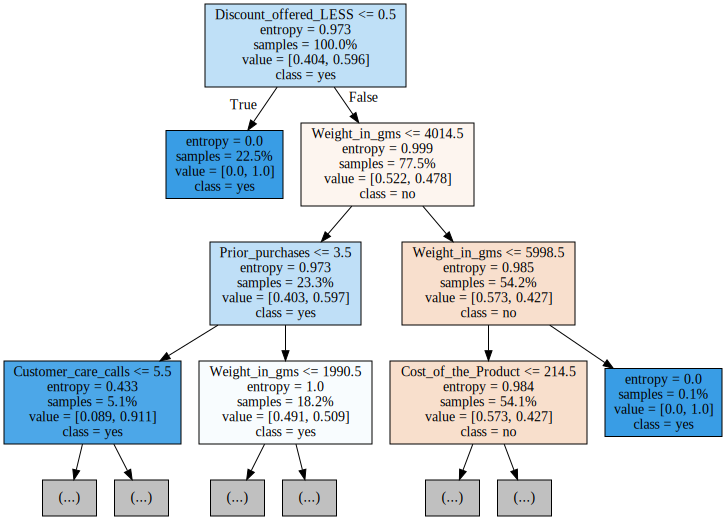

In [56]:
# graphviz 설치방법: conda install -c conda-forge python-graphviz
# depth 제한을 3으로 두고 결정트리를 그려보았습니다.
import graphviz
from sklearn.tree import export_graphviz

model_dt = pipe_dt.named_steps['decisiontreeclassifier']
enc = pipe_dt.named_steps['onehotencoder']
encoded_columns = enc.transform(X_val).columns

dot_data = export_graphviz(model_dt
                          , max_depth=3
                          , feature_names=encoded_columns
                          , class_names=['no', 'yes']
                          , filled=True
                          , proportion=True)


display(graphviz.Source(dot_data))

#### 과적합을 해결해 봅시다.
복잡한 트리는 과적합 가능성을 높이기 때문에 복잡도를 낮추어 일반화를 유도합니다.

다음은 트리의 복잡도를 줄이기 위해 자주 사용하는 하이퍼파라미터들입니다.
- min_samples_split
- min_samples_leaf
- max_depth

min_samples_leaf를 사용하하면 말단 노드(external node)에 최소한 존재해야 하는 샘플들의 수를 정해줄 수 있습니다.

과적합을 줄이는지 확인해 봅시다.

In [57]:
pipe_dt_split = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(min_samples_leaf=10, random_state=2)
)

pipe_dt_split.fit(X_train, y_train)
print('훈련 정확도', pipe_dt_split.score(X_train, y_train))
print('검증 정확도', pipe_dt_split.score(X_val, y_val))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


훈련 정확도 0.7995453899701662
검증 정확도 0.6426136363636363


In [186]:
print('테스트 정확도', pipe_dt_split.score(X_test, y_test))

테스트 정확도 0.6572727272727272


In [189]:
# f1 계산
y_dt_split_train_pred = pipe_dt_split.predict(X_train)
y_dt_split_val_pred = pipe_dt_split.predict(X_val)

In [191]:
from sklearn.metrics import f1_score

print('f1 score_train: ', f1_score(y_train, y_dt_split_train_pred))
print('f1 score_val: ', f1_score(y_val, y_dt_split_val_pred))

f1 score_train:  0.8266797690701387
f1 score_val:  0.691515448749387


max_depth를 제한해봅시다.

In [58]:
pipe_dt_depth = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(max_depth=6, random_state=2)
)

pipe_dt_depth.fit(X_train, y_train)
print('훈련 정확도', pipe_dt_depth.score(X_train, y_train))
print('검증 정확도', pipe_dt_depth.score(X_val, y_val))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


훈련 정확도 0.6917175735189658
검증 정확도 0.6823863636363636


In [185]:
print('테스트 정확도', pipe_dt_depth.score(X_test, y_test))

테스트 정확도 0.685


In [192]:
# f1 계산
y_dt_depth_train_pred = pipe_dt_depth.predict(X_train)
y_dt_depth_val_pred = pipe_dt_depth.predict(X_val)

In [193]:
print('f1 score_train: ', f1_score(y_train, y_dt_depth_train_pred))
print('f1 score_val: ', f1_score(y_val, y_dt_depth_val_pred))

f1 score_train:  0.6554461733883773
f1 score_val:  0.6459784673844204


이번에는 결정트리에서 확인 가능한 특성중요도(feature importance)에 대해 알아보겠습니다.


선형모델에서는 특성과 타겟의 관계를 확인하기 위해 회귀 계수(coefficients)를 살펴보았습니다. 하지만 결정트리에서는 대신 특성중요도를 확인할 수 있습니다. 회귀계수와 달리 특성중요도는 항상 양수값을 가집니다. 이 값을 통해 특성이 얼마나 일찍 그리고 자주 분기에 사용되는지 결정됩니다.

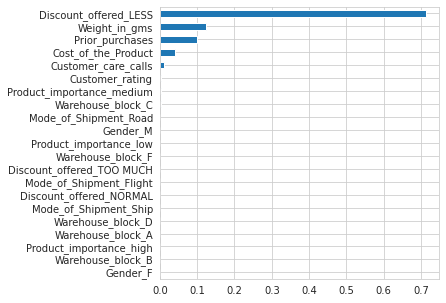

In [59]:
model_dt_depth = pipe_dt_depth.named_steps['decisiontreeclassifier']

importances = pd.Series(model_dt_depth.feature_importances_, encoded_columns)
plt.figure(figsize=(5,5))
importances.sort_values().plot.barh();

## 랜덤포레스트 적용

분류문제일 경우 다수결로 가장 많은 모델들이 선택한 범주로 예측합니다.

랜덤포레스트는 앙상블(Ensemble) 방법입니다.
- 앙상블 방법은 한 종류의 데이터로 여러 머신러닝 학습모델(weak base learner, 기본모델)을 만들어 그 모델들의 예측결과를 다수결이나 평균을 내어 예측하는 방법을 말합니다. 이론적으로 기본모델 몇가지 조건을 충족하는 여러 종류의 모델을 사용할 수 있습니다.

- 랜덤포레스트는 결정트리를 기본모델로 사용하는 앙상블 방법이라 할 수 있습니다.

- 결정트리들은 독립적으로 만들어지며 각각 랜덤으로 예측하는 성능보다 좋을 경우 랜덤포레스트는 결정트리보다 성능이 좋습니다.

부트스트랩(Bootstrap) 샘플링

앙상블에 사용하는 작은 모델들은 부트스트래핑(bootstraping)이라는 샘플링과정으로 얻은 부트스트랩세트를 사용해 학습을 합니다. 즉 원본 데이터에서 샘플링을 하는데 복원추출을 한다는 것인데 복원추출은 샘플을 뽑아 값을 기록하고 제자리에 돌려놓는 것을 말합니다.

이렇게 샘플링을 특정한 수 만큼 반복하면 하나의 부트스트랩세트가 완성됩니다. 복원추출이기 때문에 부트스트랩세트에는 같은 샘플이 반복될 수 있습니다.

랜덤포레스트를 적용해보겠습니다.
(원핫인코더)

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import make_pipeline

pipe_rf = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True)
)

pipe_rf.fit(X_train, y_train)
print('검증 정확도: ', pipe_rf.score(X_val, y_val))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


검증 정확도:  0.6460227272727272


In [187]:
print('테스트 정확도: ', pipe_rf.score(X_test, y_test))

테스트 정확도:  0.6636363636363637


순서형 인코딩으로 학습해 보았습니다.

In [61]:
from category_encoders import OrdinalEncoder

# ordinal encoding
pipe_rf_ord = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(random_state=10, n_jobs=-1, oob_score=True)
)

pipe_rf_ord.fit(X_train, y_train)
print('검증 정확도', pipe_rf_ord.score(X_val, y_val))

검증 정확도 0.665340909090909


In [188]:
print('테스트 정확도', pipe_rf_ord.score(X_test, y_test))

테스트 정확도 0.6518181818181819


#### 랜텀포레스트 특성 중요도 비교 (onehot vs ordinal)?

랜덤포레스트에서는 학습 후에 특성들의 중요도 정보(Gini importance)를 기본으로 제공합니다. 중요도는 노드들의 지니불순도(Gini impurity)를 가지고 계산하는데

노드가 중요할 수록 불순도가 크게 감소한다는 사실을 이용합니다.

노드는 한 특성의 값을 기준으로 분리가 되기 때문에 불순도를 크게 감소하는데 많이 사용된 특성이 중요도가 올라갈 것입니다.

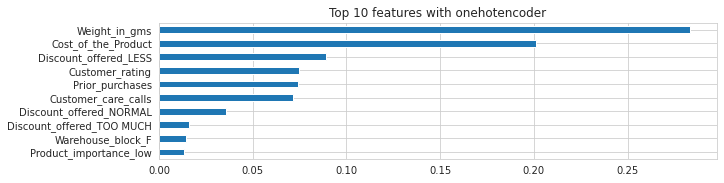

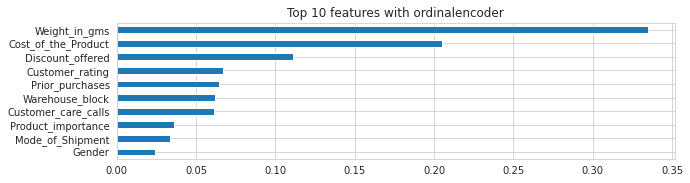

In [62]:
import matplotlib.pyplot as plt

# 특성 중요도(onehot)
rf = pipe_rf.named_steps['randomforestclassifier']
colnames = pipe_rf.named_steps['onehotencoder'].get_feature_names()
importances = pd.Series(rf.feature_importances_, colnames)

n = 10
plt.figure(figsize=(10,n/4))
plt.title(f'Top {n} features with onehotencoder')
importances.sort_values()[-n:].plot.barh();


# 특성 중요도(ordinal)
rf_ord = pipe_rf_ord.named_steps['randomforestclassifier']
importances_ord = pd.Series(rf_ord.feature_importances_, X_train.columns)

plt.figure(figsize=(10,n/4))
plt.title(f'Top {n} features with ordinalencoder')
importances_ord.sort_values()[-n:].plot.barh();

## 분류 모델의 성능 평가 지표를 보여주는 Confusion matrix 에 관해 살펴봅시다.

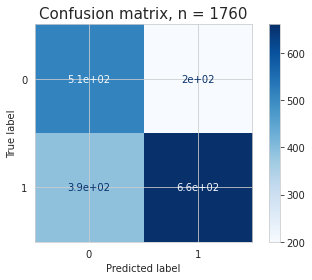

In [64]:
# 랜덤포레스트 순서형
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe_rf_ord, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

In [65]:
cm = pcm.confusion_matrix
cm

array([[511, 200],
       [389, 660]])

True Positive(TP) 정시에 도착함을 잘 예측한 경우

In [66]:
cm[1][1]

660

정확하게 맞춘 예측은 모두 몇 가지인가요? (TP + TN)

In [67]:
import numpy as np
correct_predictions = np.diag(cm).sum()
correct_predictions

1171

총 예측한 수는 어떻게 되나요?

In [68]:
total_predictions = cm.sum()
total_predictions

1760


분류 정확도(classification accuracy)를 계산해 보세요

In [69]:
correct_predictions/total_predictions

0.665340909090909

In [70]:
#위와 같은 결과를 낸다.
y_val_pred = pipe_rf_ord.predict(X_val)
print('검증 정확도: ', accuracy_score(y_val, y_val_pred))

검증 정확도:  0.665340909090909


In [194]:
print('테스트 정확도: ', accuracy_score(y_val, y_val_pred))

테스트 정확도:  0.665340909090909


분류기의 정확한 성능을 판단하기 위해서는 정확도 외에 다른 평가지표를 같이 사용해야 합니다.


특히 정밀도(precision), 재현율(recall) 을 살펴보아야 합니다.

정확도(Accuracy)는 전체 범주를 모두 바르게 맞춘 경우를 전체 수로 나눈 값입니다: $\large \frac{TP + TN}{Total}$

정밀도(Precision)는 Positive로 예측한 경우 중 올바르게 Positive를 맞춘 비율입니다: $\large \frac{TP}{TP + FP}$

재현율(Recall, Sensitivity)은 실제 Positive인 것 중 올바르게 Positive를 맞춘 것의 비율 입니다: $\large \frac{TP}{TP + FN}$

F1점수(F1 score)는 정밀도와 재현율의 조화평균(harmonic mean)입니다: $ 2\cdot\large\frac{precision\cdot recall}{precision + recall}$


In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.57      0.72      0.63       711
           1       0.77      0.63      0.69      1049

    accuracy                           0.67      1760
   macro avg       0.67      0.67      0.66      1760
weighted avg       0.69      0.67      0.67      1760



In [72]:
# AUC 점수는 높을수록 좋습니다!
from sklearn.metrics import roc_auc_score

y_pred_proba = pipe_rf_ord.predict_proba(X_val)[:, -1]
print('AUC score: ', roc_auc_score(y_val, y_pred_proba))

AUC score:  0.7429632936867072


Text(0, 0.5, 'TPR')

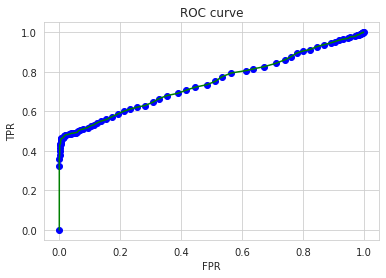

In [73]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

plt.scatter(fpr, tpr, color='blue')
plt.plot(fpr, tpr, color='green')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

## 모델 해석과 특성 선택을 위한 순열 중요도(Permutation Importances) 계산

1. Feature Importances(Mean decrease impurity, MDI)

sklearn 트리 기반 분류기에서 디폴트로 사용되는 특성 중요도는 속도는 빠르지만 결과를 주의해서 봐야 합니다. 각각 특성을 모든 트리에 대해 평균불순도감소(mean decrease impurity)를 계산한 값입니다.

Warning: impurity-based feature importances can be misleading for high cardinality features (many unique values).

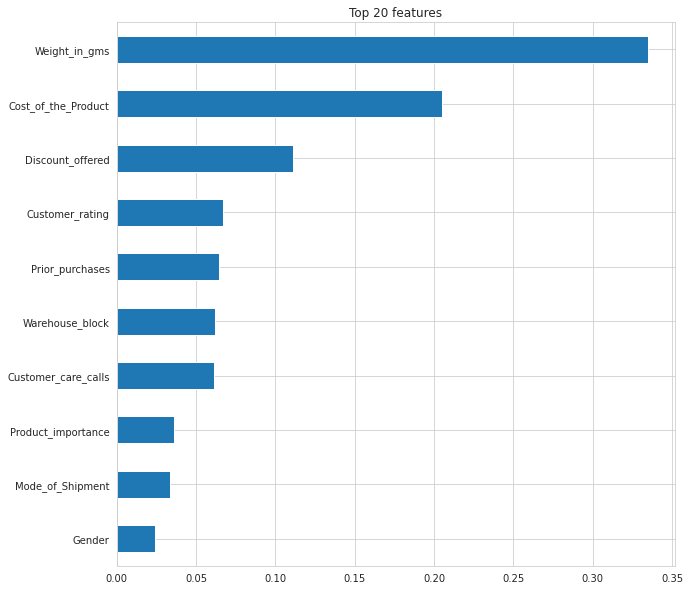

In [74]:
# 특성 중요도
rf = pipe_rf_ord.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

2. Drop-Column Importance

이론적으로 가장 좋아 보이는 방법이지만, 매 특성을 drop한 후 fit을 다시 해야 하기 때문에 매우 느리다는 단점이 있습니다.

특성이 n개 존재할 때 n + 1 번 학습이 필요합니다.

3. 순열중요도, (Permutation Importance, Mean Decrease Accuracy,MDA)

순열 중요도는 기본 특성 중요도와 Drop-column 중요도 중간에 위치하는 특징을 가진다고 볼 수 있습니다.

중요도 측정은 관심있는 특성에만 무작위로 노이즈를 주고 예측을 하였을 때 성능 평가지표(정확도, F1, $R^2$ 등)가 얼마나 감소하는지를 측정합니다.

Drop-column 중요도를 계산하기 위해 재학습을 해야 했다면, 순열중요도는 검증데이터에서 각 특성을 제거하지 않고 특성값에 무작위로 노이즈를 주어 기존 정보를 제거하여 특성이 기존에 하던 역할을 하지 못하게 하고 성능을 측정합니다. 이때 노이즈를 주는 가장 간단한 방법이 그 특성값들을 샘플들 내에서 섞는 것(shuffle, permutation) 입니다.

In [75]:
from sklearn.pipeline import Pipeline
# encoder, imputer를 preprocessing으로 묶었습니다. 후에 eli5 permutation 계산에 사용합니다
pipe_rf_ord_line = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
    ('rf', RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True)) 
])

In [76]:
# pipeline 생성을 확인합니다.
pipe_rf_ord_line.named_steps

{'preprocessing': Pipeline(memory=None,
          steps=[('ordinalencoder',
                  OrdinalEncoder(cols=None, drop_invariant=False,
                                 handle_missing='value', handle_unknown='value',
                                 mapping=None, return_df=True, verbose=0)),
                 ('simpleimputer',
                  SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                missing_values=nan, strategy='mean',
                                verbose=0))],
          verbose=False),
 'rf': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
         

In [77]:
pipe_rf_ord_line.fit(X_train, y_train)
print('검증 정확도: ', pipe_rf_ord_line.score(X_val, y_val))

검증 정확도:  0.665340909090909


In [195]:
print('테스트 정확도: ', pipe_rf_ord_line.score(X_val, y_val))

테스트 정확도:  0.665340909090909


In [78]:
pip install eli5

     |████████████████████████████████| 112kB 6.6MB/s 


In [79]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    pipe_rf_ord_line.named_steps['rf'], # model
    scoring='accuracy', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_val_transformed = pipe_rf_ord_line.named_steps['preprocessing'].transform(X_val)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val_transformed, y_val);

In [80]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

Product_importance    -0.006250
Warehouse_block        0.002727
Mode_of_Shipment       0.003864
Customer_care_calls    0.006591
Gender                 0.009432
Cost_of_the_Product    0.013750
Customer_rating        0.014773
Discount_offered       0.018182
Prior_purchases        0.018409
Weight_in_gms          0.048523
dtype: float64

In [81]:
# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.0485 ± 0.0091,Weight_in_gms
0.0184 ± 0.0101,Prior_purchases
0.0182 ± 0.0110,Discount_offered
0.0148 ± 0.0084,Customer_rating
0.0137 ± 0.0193,Cost_of_the_Product
0.0094 ± 0.0027,Gender
0.0066 ± 0.0110,Customer_care_calls
0.0039 ± 0.0056,Mode_of_Shipment
0.0027 ± 0.0086,Warehouse_block
-0.0063 ± 0.0057,Product_importance


중요도를 이용하여 특성을 선택(Feature selection)해 봅시다.

중요도가 -인 특성을 제외해도 성능은 거의 영향이 없으며, 모델학습 속도는 개선됩니다.

In [82]:
print('특성 삭제 전:', X_train.shape, X_val.shape)

특성 삭제 전: (7039, 10) (1760, 10)


In [83]:
minimum_importance = 0.001
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train_selected = X_train[features]
X_val_selected = X_val[features]

In [84]:
print('특성 삭제 후:', X_train_selected.shape, X_val_selected.shape)

특성 삭제 후: (7039, 9) (1760, 9)


In [85]:
# pipeline 다시 정의
pipe = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
    ('rf', RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True)) 
], verbose=1)

pipe.fit(X_train_selected, y_train);

[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.1s
[Pipeline] ................ (step 2 of 2) Processing rf, total=   1.0s


In [86]:
print('검증 정확도: ', pipe.score(X_val_selected, y_val))

검증 정확도:  0.6704545454545454


In [87]:
# 순열 중요도의 평균 감소값과 그 표준편차의 차가 양수인 특징들을 확인할 수 있습니다.
permuter.feature_importances_ - permuter.feature_importances_std_ > 0

array([False,  True,  True,  True,  True,  True, False,  True,  True,
        True])

## Boosting(xgboost for gradient boosting)

분류문제를 풀기 위해서는 트리 앙상블 모델을 많이 사용합니다.

- 트리 앙상블은 랜덤포레스트나 그래디언트 부스팅 모델을 이야기 하며 여러 문제에서 좋은 성능을 보이는 것을 확인하였습니다.
- 트리모델은 non-linear, non-monotonic 관계, 특성간 상호작용이 존재하는 데이터 학습에 적용하기 좋습니다.
- 한 트리를 깊게 학습시키면 과적합을 일으키기 쉽기 때문에. 배깅(Bagging, 랜덤포레스트)이나 부스팅(Boosting) 앙상블 모델을 사용해 과적합을 피합니다.
- 랜덤포레스트의 장점은 하이퍼파라미터에 상대적으로 덜 민감한 것인데, 그래디언트 부스팅의 경우 하이퍼파라미터 셋팅에 따라 랜덤포레스트 보다 더 좋은 예측 성능을 보여줄 수도 있습니다.

##### 부스팅과 배깅의 차이점은?
랜덤포레스트나 그래디언트 부스팅은 모두 트리 앙상블 모델이지만 트리를 만드는 방법에 차이가 있습니다.

가장 큰 차이는, 랜덤포레스트의 경우 각 트리를 독립적으로 만들지만 부스팅은 만들어지는 트리가 이전에 만들어진 트리에 영향을 받는다는 것입니다.

부스팅 알고리즘 중 AdaBoost는 각 트리(약한 학습기들, weak learners)가 만들어질 때 잘못 분류되는 관측치에 가중치를 줍니다.

그리고 다음 트리가 만들어질 때 이전에 잘못 분류된 관측치가 더 많이 샘플링되게 하여 그 관측치를 분류하는데 더 초점을 맞춥니다.

In [110]:
from xgboost import XGBClassifier

pipe_xgb = make_pipeline(
    OrdinalEncoder(),
#     SimpleImputer(strategy='median'), # xgboost 에서는 missing value 처리를 해 줍니다
    XGBClassifier(n_estimators=200
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.2
                 )
)

pipe_xgb.fit(X_train, y_train);

In [111]:
from sklearn.metrics import accuracy_score
y_pred_xgb = pipe_xgb.predict(X_val)
print('검증 정확도: ', accuracy_score(y_val, y_pred_xgb))

print(classification_report(y_pred_xgb, y_val))

검증 정확도:  0.6545454545454545
              precision    recall  f1-score   support

           0       0.64      0.56      0.60       807
           1       0.66      0.73      0.70       953

    accuracy                           0.65      1760
   macro avg       0.65      0.65      0.65      1760
weighted avg       0.65      0.65      0.65      1760



그래디언트 부스팅 결과를 해석하려면??

선형모델은 회귀계수(coefficients)를 이용해 변수와 타겟 관계를 해석할 수 있지만 트리모델은 할 수 없습니다.

대신 부분의존그림(Partial dependence plots)을 사용하여 개별 특성과 타겟간의 관계를 볼 수 있습니다.

### PDP (1 특성 사용)

In [98]:
!pip install shap

     |████████████████████████████████| 358kB 6.3MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491636 sha256=9522decfc2a555c0320f31ec55cded6e61ac26a254818d0e154f3236b1fbd30a
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [99]:
!pip install pdpbox

     |████████████████████████████████| 34.0MB 114kB/s 
     |████████████████████████████████| 13.1MB 34.9MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-cp37-none-any.whl size=35758228 sha256=b005bf0862dd3a468b61f21a04fe8c9ef03ada32b8b42dfd7782e4cf90add621
  Stored in directory: /root/.cache/pip/wheels/c8/13/11/ecac74c6192790c94f6f5d919f1a388f927b9febb690e45eef
Successfully built pdpbox
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [100]:
from pdpbox.pdp import pdp_isolate, pdp_plot

그래디언트 부스팅 모델에서 'Customer_rating' PDP를 그려보았습니다.

In [103]:
feature = 'Weight_in_gms'
isolated = pdp_isolate(
    model=boosting, 
    dataset=X_val_encoded, 
    model_features=X_val_encoded.columns, 
    feature=feature
)

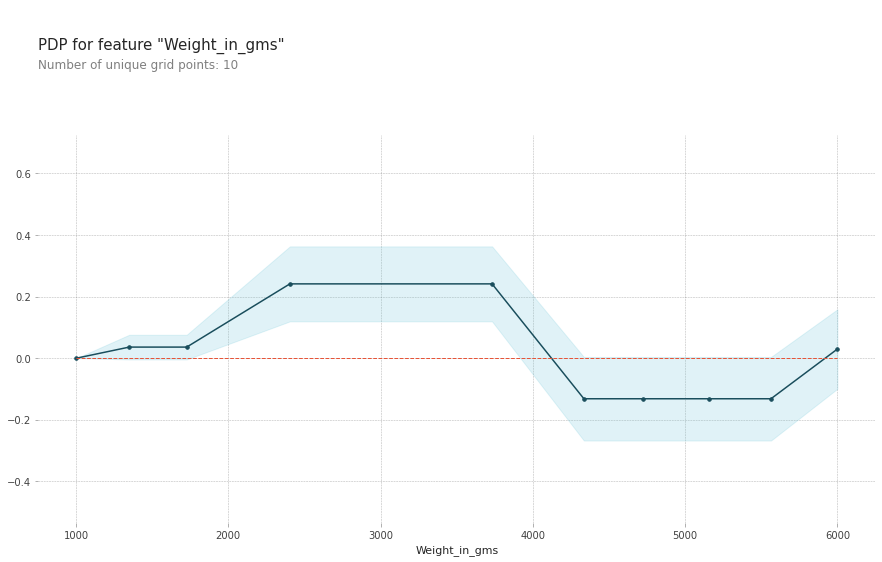

In [104]:
pdp_plot(isolated, feature_name=feature);

### SHAP 라이브러리를 이용해 개별 예측을 설명해 봅시다

Shapley values

SHAP 라이브러리는 게임이론에 나오는 Shapley values 에 기초해 머신러닝에서 Shapley values를 계산할 수 있도록 합니다.

게임이론에서 같은 팀 선수들(특성들)이 게임 목표(예측) 달성을 위해 각자 자신의 역할(기여)을 한다고 할 때 게임 목표 달성 후 받은 포상을 어떻게 하면 그들의 기여도에 따라 공평하게 나누어 줄 수 있을 것인가? 라는 질문과 연관됩니다.

사실 특성 갯수가 많아질 수록 Shapley value를 구할 때 필요한 계산량이 기하급수적으로 늘어납니다. 그래서 SHAP에서는 샘플링을 이용해 근사적으로 값을 구합니다. 앞으로 SHAP을 통해 구하는 값은 Shap value라고 부르겠습니다.

SHAP value를 분류 문제에 적용해 봅시다

In [114]:
# 클래스의 비율
y_train.value_counts(normalize=True)

1    0.595681
0    0.404319
Name: Reached_on_time, dtype: float64

In [116]:
ratio = 0.40 / 0.60

ratio

0.6666666666666667

In [117]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

processor = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

eval_set = [(X_train_processed, y_train), 
            (X_val_processed, y_val)]

# XGBoost 분류기를 학습시킵니다. 클래스 비율을 맞추기 위해 scale_pos_weight= #Charged Off / # Fully Paid
model = XGBClassifier(n_estimators=1000, verbosity=0, n_jobs=-1, scale_pos_weight=ratio)
model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10)

[0]	validation_0-auc:0.742415	validation_1-auc:0.741569
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.744564	validation_1-auc:0.742967
[2]	validation_0-auc:0.744419	validation_1-auc:0.742918
[3]	validation_0-auc:0.748332	validation_1-auc:0.740573
[4]	validation_0-auc:0.748366	validation_1-auc:0.740608
[5]	validation_0-auc:0.752562	validation_1-auc:0.741243
[6]	validation_0-auc:0.756922	validation_1-auc:0.746727
[7]	validation_0-auc:0.75677	validation_1-auc:0.750497
[8]	validation_0-auc:0.756904	validation_1-auc:0.746876
[9]	validation_0-auc:0.756808	validation_1-auc:0.750476
[10]	validation_0-auc:0.756825	validation_1-auc:0.750537
[11]	validation_0-auc:0.756841	validation_1-auc:0.750531
[12]	validation_0-auc:0.756878	validation_1-auc:0.750637
[13]	validation_0-auc:0.757208	validation_1-auc:0.747135
[14]	validation_0-auc:0.757574	validation_1-auc:0.748696

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.6666666666666667,
              seed=None, silent=None, subsample=1, verbosity=0)

In [141]:
model.classes_

array([0, 1])

In [119]:
from sklearn.metrics import roc_auc_score
X_test_processed = processor.transform(X_test)
X_val_processed = processor.transform(X_val)
class_index = 1
y_pred_proba = model.predict_proba(X_test_processed)[:, class_index]
print(f'Test AUC for class "{model.classes_[class_index]}":')
print(roc_auc_score(y_test, y_pred_proba)) # 범위는 0-1, 수치는 높을 수록 좋습니다

Test AUC for class "1":
0.7450430991793544


In [120]:
# Confution matrix를 확인해 봅시다
from sklearn.metrics import classification_report
y_test_pred = model.predict(X_test_processed)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.56      0.98      0.71       879
           1       0.97      0.49      0.65      1321

    accuracy                           0.69      2200
   macro avg       0.77      0.73      0.68      2200
weighted avg       0.81      0.69      0.68      2200



SHAP 그래프로 예측을 설명해 봅시다.

In [123]:
df_p = pd.DataFrame({
    #'id': test_id, 
    'pred_proba': y_pred_proba, # 예측확률 
    'status_group': y_test # 실제값
})

df_p

,pred_proba,status_group
4739,0.367244,0
7961,0.405412,0
9990,0.332389,1
4974,0.334855,0
8668,0.337411,1
...,...,...
3249,0.350542,1
8729,0.353072,0
20,0.950564,1
4321,0.353072,1


In [136]:
# 테스트셋에서 인덱스 1 샘플의 예측을 살펴보겠습니다.
# 우선 모든 특성 수치를 봅시다
row = X_test.iloc[[100]]
row

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
6950,A,Ship,3,1,221,2,medium,F,LESS,5267


In [137]:
## UnicodeDecoderError 발생시 xgboost 1.1-> 1.0 다운그레이드 (conda install -c conda-forge xgboost=1.0)
import xgboost
import shap

explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit' # SHAP value를 확률로 변환해 표시합니다.
)

예측을 SHAP그래프를 통해 설명하는 함수를 만들어 봅시다

In [138]:
feature_names = row.columns
feature_values = row.values[0]
shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))

In [139]:
pros = shaps.sort_values(ascending=False)[:3].index
cons = shaps.sort_values(ascending=True)[:3].index

In [140]:
print('Reached_on_time 예측에 대한 Positive 요인 Top 3 입니다:')
for i, pro in enumerate(pros, start=1):
    feature_name, feature_value = pro
    print(f'{i}. {feature_name} : {feature_value}')

print('\n')
print('Negative 요인 Top 3 입니다:')
for i, con in enumerate(cons, start=1):
    feature_name, feature_value = con
    print(f'{i}. {feature_name} : {feature_value}')

fully paid 예측에 대한 Positive 요인 Top 3 입니다:
1. Prior_purchases : 2
2. Cost_of_the_Product : 221
3. Gender : F


Negative 요인 Top 3 입니다:
1. Discount_offered : LESS
2. Weight_in_gms : 5267
3. Customer_rating : 1


In [143]:
def explain(row_number):
    positive_class = 'On_Time'
    positive_class_index = 1

    # row 값을 변환합니다
    row = X_test.iloc[[row_number]]
    row_processed = processor.transform(row)

    # 예측하고 예측확률을 얻습니다 
    pred = model.predict(row_processed)[0]
    pred_proba = model.predict_proba(row_processed)[0, positive_class_index]
    pred_proba *= 100
    if pred != positive_class:
        pred_proba = 100 - pred_proba

    # 예측결과와 확률값을 얻습니다
    print(f'이 대출에 대한 예측결과는 {pred} 으로, 확률은 {pred_proba:.0f}% 입니다.')
    
    # SHAP를 추가합니다
    shap_values = explainer.shap_values(row_processed)

    # Fully Paid에 대한 top 3 pros, cons를 얻습니다
    feature_names = row.columns
    feature_values = row.values[0]
    shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))
    pros = shaps.sort_values(ascending=False)[:3].index
    cons = shaps.sort_values(ascending=True)[:3].index

    # 예측에 가장 영향을 준 top3
    print('\n')
    print('Positive 영향을 가장 많이 주는 3가지 요인 입니다:')
    
    evidence = pros if pred == positive_class else cons
    for i, info in enumerate(evidence, start=1):
        feature_name, feature_value = info
        print(f'{i}. {feature_name} : {feature_value}')

    # 예측에 가장 반대적인 영향을 준 요인 top1
    print('\n')
    print('Negative 영향을 가장 많이 주는 3가지 요인 입니다:')
    
    evidence = cons if pred == positive_class else pros
    for i, info in enumerate(evidence, start=1):
        feature_name, feature_value = info
        print(f'{i}. {feature_name} : {feature_value}')

    # SHAP
    shap.initjs()
    return shap.force_plot(
        base_value=explainer.expected_value, 
        shap_values=shap_values, 
        features=row, 
        link='logit'
    )

In [144]:
explain(100)

이 대출에 대한 예측결과는 0 으로, 확률은 65% 입니다.


Positive 영향을 가장 많이 주는 3가지 요인 입니다:
1. Discount_offered : LESS
2. Weight_in_gms : 5267
3. Customer_rating : 1


Negative 영향을 가장 많이 주는 3가지 요인 입니다:
1. Prior_purchases : 2
2. Cost_of_the_Product : 221
3. Gender : F
